In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from unityagents import UnityEnvironment
import numpy as np
import pickle


In [2]:
import sys
sys.path.insert(0, '../classes')
from dqn_agent import Agent

In [3]:
env = UnityEnvironment(file_name="/Users/saboulaban/Documents/deep-reinforcement-learning/p1_navigation/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

In [5]:
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, seed=42)

Episode 100	Average Score: 0.67
Episode 200	Average Score: 3.82
Episode 300	Average Score: 6.17
Episode 400	Average Score: 9.48
Episode 500	Average Score: 12.85
Episode 503	Average Score: 13.00
Environment solved in 403 episodes!	Average Score: 13.00
Episode 518	Average Score: 13.58
Environment solved in 418 episodes!	Average Score: 13.58
Episode 585	Average Score: 14.09
Environment solved in 485 episodes!	Average Score: 14.09
Episode 600	Average Score: 14.60

Environment solved in 500 episodes!	Average Score: 14.60
Episode 634	Average Score: 15.12
Environment solved in 534 episodes!	Average Score: 15.12
Episode 687	Average Score: 15.63
Environment solved in 587 episodes!	Average Score: 15.63
Episode 700	Average Score: 15.67
Episode 800	Average Score: 15.48
Episode 900	Average Score: 15.38
Episode 1000	Average Score: 15.80
Episode 1031	Average Score: 16.18
Environment solved in 931 episodes!	Average Score: 16.18
Episode 1100	Average Score: 15.40
Episode 1200	Average Score: 15.35
Episod

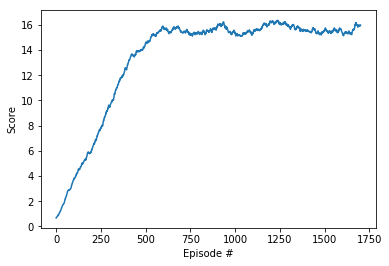

In [7]:
def dqn(n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    target_score = 13.0
    scores = []                        # list containing scores from each episode
    scores_windows = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    model_number = 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if len(scores_window) == 100:
            scores_windows.append(np.mean(scores_window))            
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=target_score:
            model_number += 1
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), '../models/vanilla.dqn.m-' + str(model_number) + '.pth')
            target_score = np.mean(scores_window) + 0.5
    return scores_windows

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

    

In [10]:
outfile = '../pickle/vanilla.dqn.pkl'
with open(outfile,'wb') as outfd:
    pickle.dump(scores, outfd, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
env.close()